# 이미지 분석
- 유명한 브랜드, 랜드마크 있는가
- 이미지 캡션(설명)
- 이미지 칼라맵


## 개와 고양이 실습1 - params 문제 있음

In [39]:
image_url = "https://health.chosun.com/site/data/img_dir/2023/04/21/2023042102030_0.jpg"
#image_url = "https://image.newdaily.co.kr/site/data/img/2012/11/28/2012112800100_0.jpg"

In [40]:
from PIL import Image
from io import BytesIO
import requests

In [41]:
requests.get(image_url).content # 이미지와 같은 바이너리 파일은 conent로 가져옴 text가 아니라

b'\xff\xd8\xff\xe0\xbfJJFXX\x00\x13\xa0f\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff

In [42]:
BytesIO(requests.get(image_url).content) # 변경해주기

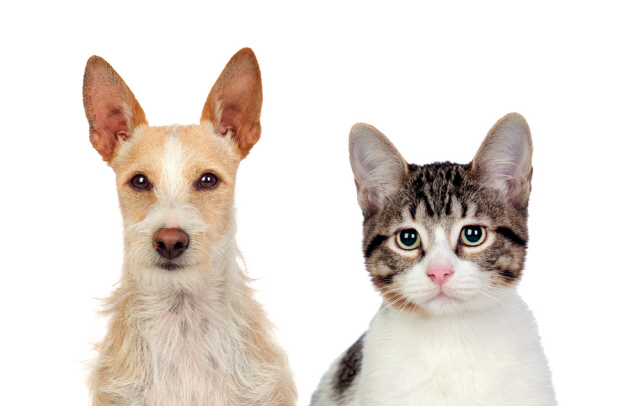

In [43]:
Image.open(BytesIO(requests.get(image_url).content))

In [44]:
key = '914cb258620445fdb10e17806d004ea7'
# e747e421639b4b85afd39e6d50114208
endpoint = 'https://labuser59computervision.cognitiveservices.azure.com/'
# 클라우드가 분석 후 결과를 json 형식으로 return해
endpoint += 'vision/v2.0/'
# 버전을 업하면 더 정확하게 나옴. 품종까지!

analyze_endpoint = endpoint + 'analyze'
detect_endpoint = endpoint + 'detect'
ocr_endpoint = endpoint + 'ocr'

In [48]:
headers = {'Ocp-Apim-Subscription-Key' : key}
params = {'visualFeatures' : 'Categories, Description, Color'}
data = {'url': image_url}

In [51]:
response = requests.post(analyze_endpoint, headers=headers,json=data)
response

result = response.json()
result

{'categories': [{'name': 'animal_cat', 'score': 0.99609375}],
 'requestId': '20588a87-d130-4914-8051-47c758a0c095',
 'metadata': {'height': 406, 'width': 640, 'format': 'Jpeg'}}

## 개 고양이 분석 실습2

In [52]:
image_url = 'https://st3.depositphotos.com/1004199/12631/i/950/depositphotos_126310760-stock-photo-cat-and-dog-together.jpg'

In [53]:
from PIL import Image
from io import BytesIO
import requests

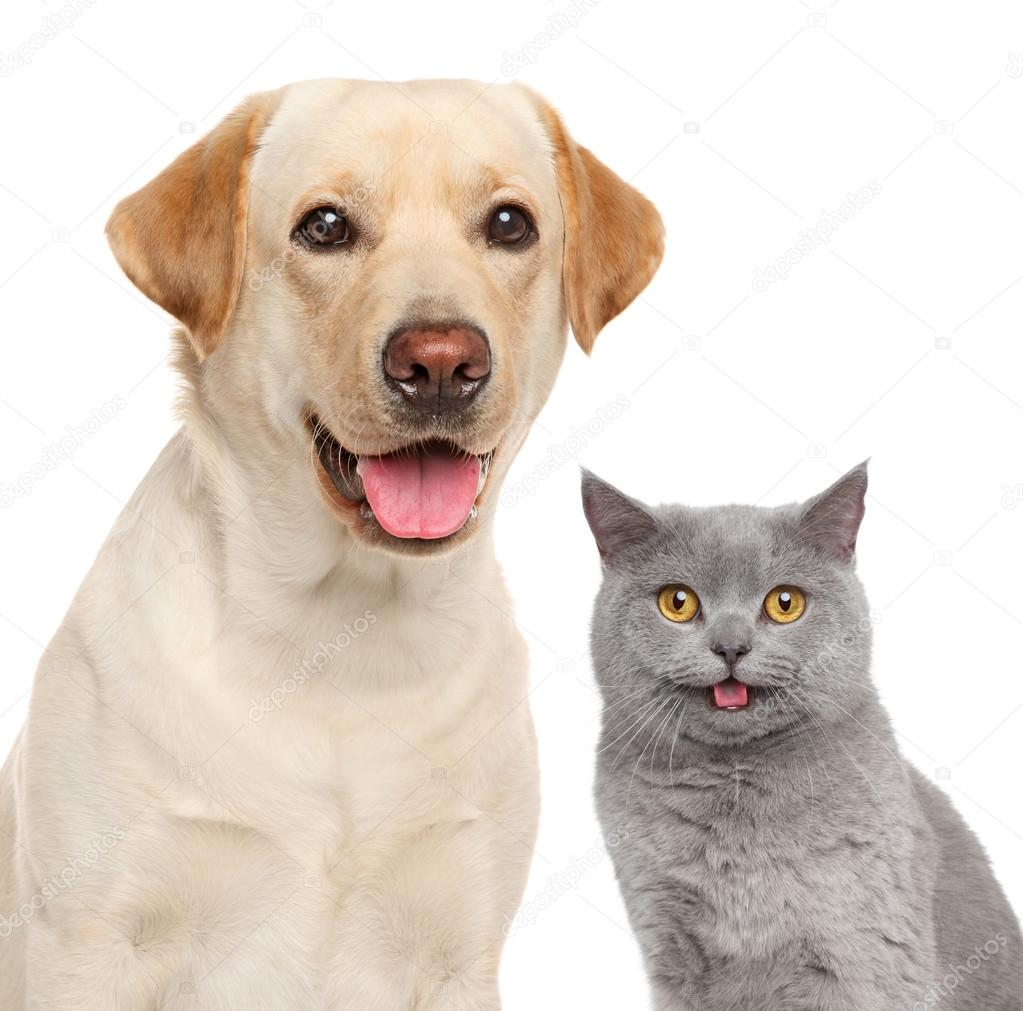

In [54]:
Image.open(BytesIO(requests.get(image_url).content))

In [55]:
key = '819850b090964eddae67fd705e9ef2aa'
endpoint = 'https://labuser51computervision.cognitiveservices.azure.com/'
endpoint = endpoint + 'vision/v2.0/'

analyze_endpoint = endpoint + 'analyze'
detect_endpoint = endpoint + 'detect'
ocr_endpoint = endpoint + 'ocr'

In [56]:
headers = {'Ocp-Apim-Subscription-Key': key}
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url': image_url}

In [57]:
response = requests.post(analyze_endpoint,
                         headers=headers,
                         params=params,
                         json=data)
result = response.json()
result

{'categories': [{'name': 'animal_dog', 'score': 0.99609375}],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'White',
  'dominantColors': ['White', 'Grey'],
  'accentColor': 'A82332',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['dog',
   'sitting',
   'indoor',
   'animal',
   'standing',
   'mammal',
   'cat',
   'brown',
   'looking',
   'camera',
   'front',
   'large',
   'close',
   'laying'],
  'captions': [{'text': 'a dog looking at the camera',
    'confidence': 0.9685949085332423}]},
 'requestId': '14577bb2-7402-4b4b-8a2a-92a77c79ec7c',
 'metadata': {'height': 1011, 'width': 1023, 'format': 'Jpeg'}}

## json의 description만 가져와서 확인하기

In [63]:
result['description']['captions'][0]['text']

'a dog looking at the camera'

# Object Detection
- 객체 탐지

In [64]:
response = requests.post(detect_endpoint,
                         headers =headers,
                         json = data)
result = response.json()
result

{'objects': [{'rectangle': {'x': 1, 'y': 81, 'w': 655, 'h': 918},
   'object': 'dog',
   'confidence': 0.887,
   'parent': {'object': 'mammal',
    'confidence': 0.915,
    'parent': {'object': 'animal', 'confidence': 0.916}}},
  {'rectangle': {'x': 575, 'y': 462, 'w': 436, 'h': 537},
   'object': 'cat',
   'confidence': 0.881,
   'parent': {'object': 'mammal',
    'confidence': 0.899,
    'parent': {'object': 'animal', 'confidence': 0.899}}}],
 'requestId': '9984383d-5dd4-4411-b13b-2948454b6bf4',
 'metadata': {'height': 1011, 'width': 1023, 'format': 'Jpeg'}}

In [65]:
from PIL import Image, ImageDraw, ImageFont

In [68]:
image = Image.open(BytesIO(requests.get(image_url).content))
draw = ImageDraw.Draw(image) #그릴 수 있는 형식으로 바꿔

In [90]:
# 이미지 안의 박스 여러개 칠 것이니까 함수 만들어서 돌리자
def CreateRectangle(objectInfo):
  objects = objectInfo['objects']

  for obj in objects:
    rect = obj['rectangle']
    x, y, w, h = rect['x'], rect['y'], rect['w'], rect['h']
    # Draw rectangle on the image
    draw.rectangle(((x, y), (x + w, y + h)), outline='red', width=2)


In [91]:
CreateRectangle(result)

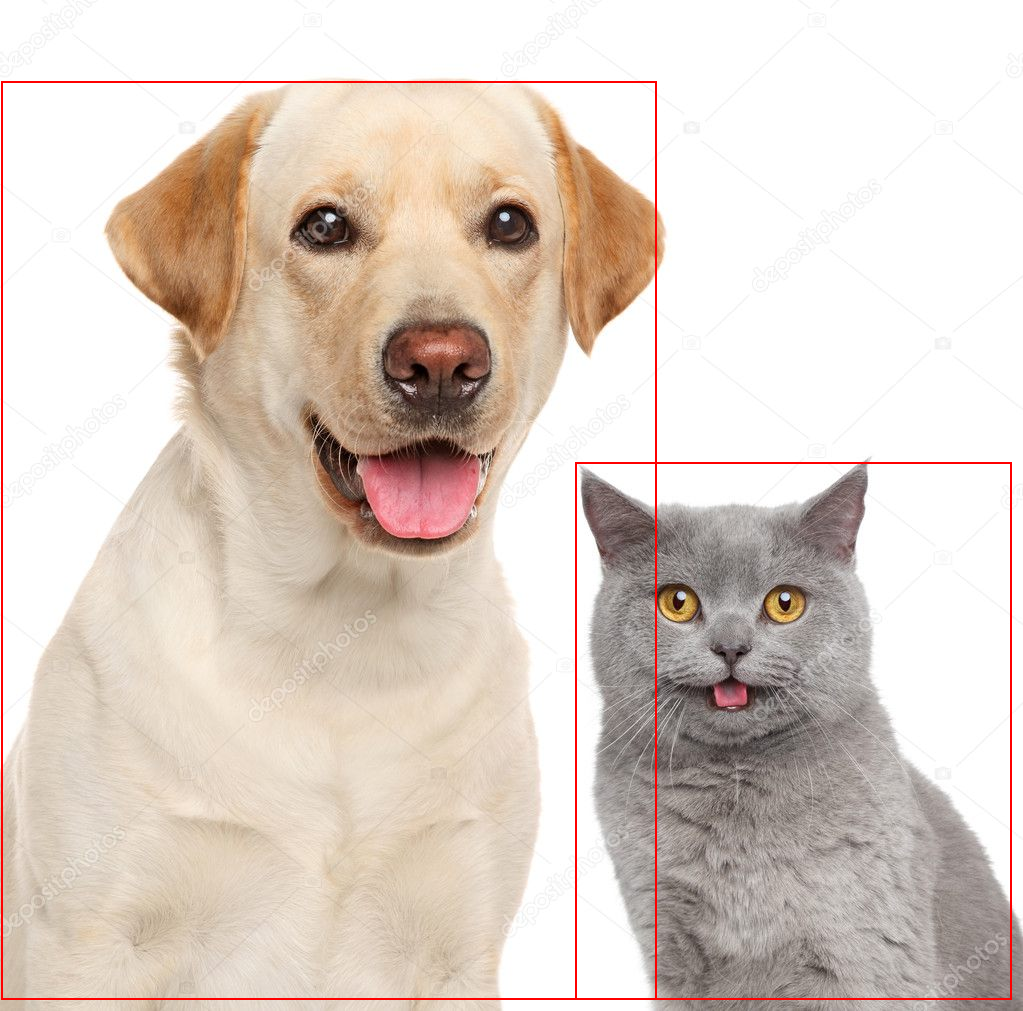

In [92]:
image

# OCR

In [ ]:
# 다음에